In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('TBS-ecotriplet\\2025_05_26.txt', delimiter='\t')

In [3]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,05/19/25,12:01:47,700.0,50.0,695.0,50.0,460.0,53.0,543.0,NaN
1,05/19/25,12:01:48,700.0,50.0,695.0,50.0,460.0,36.0,543.0,NaN
2,05/19/25,12:01:50,700.0,50.0,695.0,50.0,460.0,48.0,543.0,NaN
3,05/19/25,12:01:51,700.0,50.0,695.0,50.0,460.0,66.0,543.0,NaN
4,05/19/25,12:01:52,700.0,50.0,695.0,50.0,460.0,50.0,543.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6104,05/26/25,14:00:42,700.0,4130.0,695.0,1361.0,460.0,4130.0,552.0,NaN
6105,05/26/25,14:00:43,700.0,4130.0,695.0,1360.0,460.0,4130.0,552.0,NaN
6106,05/26/25,14:00:45,700.0,4130.0,695.0,1349.0,460.0,4130.0,552.0,NaN
6107,05/26/25,14:00:46,700.0,4130.0,695.0,1331.0,460.0,4130.0,552.0,NaN


In [4]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [5]:

#df['cDOM'] = pd.to_numeric(df['cDOM'], errors='coerce')


In [6]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [7]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM'].astype(float)-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_14352\1465471502.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [8]:
datetime = df['datetime'] 

(0.0, 10.0)

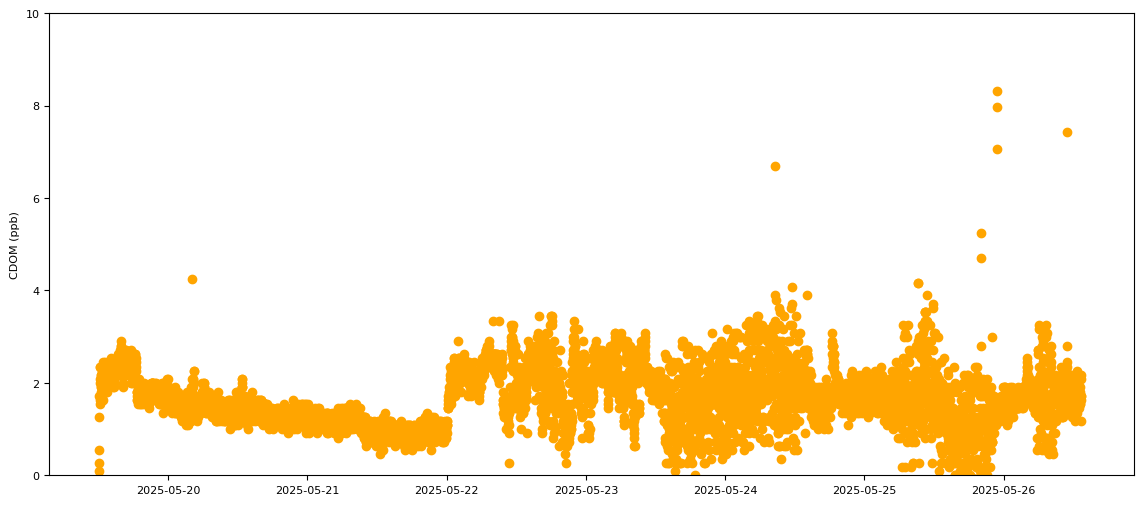

In [9]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime[:], cDOM[:], color='orange')
plt.ylabel('CDOM (ppb)')
plt.ylim(0, 10)

Text(0, 0.5, 'b (m-1 sr-1)')

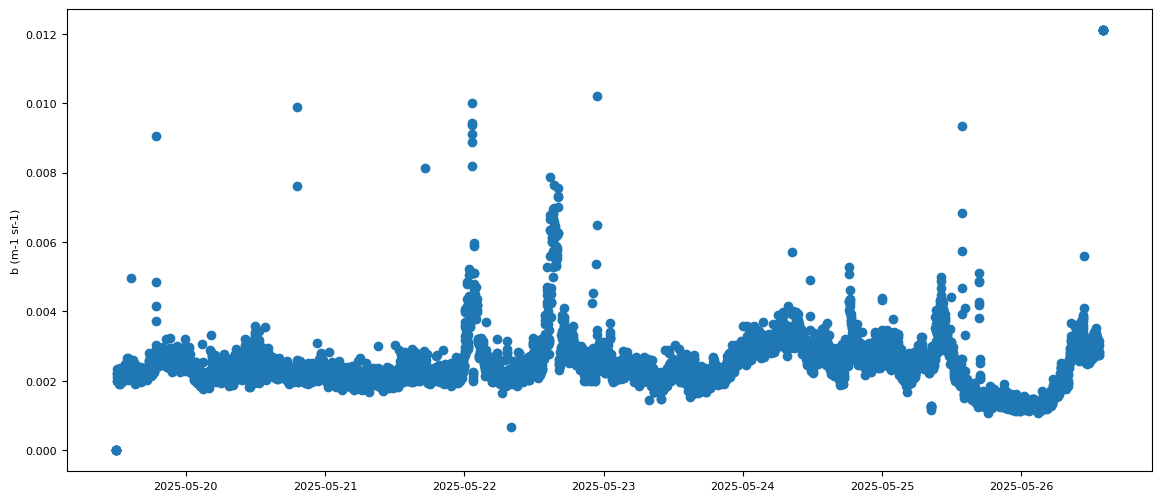

In [10]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime[:], turb[:])
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
#plt.ylim(0,0.015)

(0.0, 10.0)

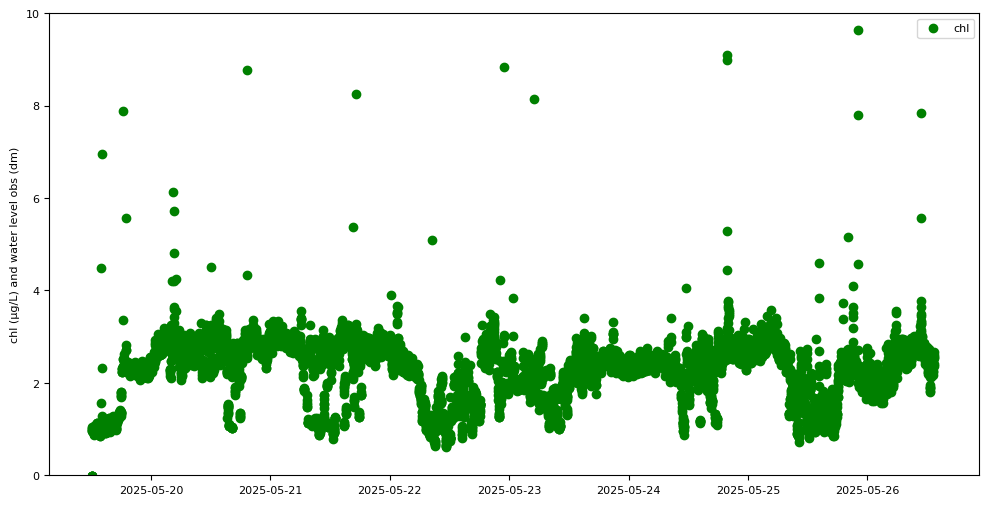

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime[:], chl[:], color = 'green', label='chl')
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.legend(loc='best')
plt.ylim(0,10)

In [12]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [13]:
print(calibrated_data)

                datetime      chl      turb      cDOM
0    2025-05-19 12:01:47  -0.0122  0.000000    0.5430
1    2025-05-19 12:01:48  -0.0122  0.000000   -0.9955
2    2025-05-19 12:01:50  -0.0122  0.000000    0.0905
3    2025-05-19 12:01:51  -0.0122  0.000000    1.7195
4    2025-05-19 12:01:52  -0.0122  0.000000    0.2715
...                  ...      ...       ...       ...
6104 2025-05-26 14:00:42  15.9820  0.012101  369.5115
6105 2025-05-26 14:00:43  15.9698  0.012101  369.5115
6106 2025-05-26 14:00:45  15.8356  0.012101  369.5115
6107 2025-05-26 14:00:46  15.6160  0.012101  369.5115
6108                 NaT      NaN       NaN       NaN

[6109 rows x 4 columns]


In [14]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_05_26.txt', sep='\t')